### in this notebook we'll create a single_neuron network with a custom loss function. we'll go step by step, outputting the results after each step. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

define an arbitrary function that we'll use to generate data. in the end we'll check how close to the function coefficientts the NN gets its weights

In [2]:
def func(x1,x2):
    y = 5*x1 + 3*x2
    return y

number of rows in the dataset

In [3]:
nrows = 100

In [4]:
x1arr = np.random.rand(nrows)
x1arr

array([0.31824804, 0.90408086, 0.30205856, 0.40262022, 0.95272907,
       0.47259068, 0.37801183, 0.23451266, 0.4343052 , 0.27298913,
       0.15811549, 0.21144712, 0.2456864 , 0.41821316, 0.72231581,
       0.72578601, 0.08283911, 0.5278483 , 0.97510664, 0.43433654,
       0.73936011, 0.64945919, 0.75607874, 0.3510932 , 0.54483481,
       0.54746599, 0.02989706, 0.05928457, 0.57692078, 0.985208  ,
       0.34963785, 0.93712101, 0.14508204, 0.90930876, 0.75998366,
       0.13698744, 0.20587266, 0.79243448, 0.40146222, 0.27900507,
       0.58524594, 0.8544767 , 0.62972768, 0.89889797, 0.67095576,
       0.37564949, 0.73395672, 0.28286187, 0.17848098, 0.4877965 ,
       0.81454337, 0.73449574, 0.22318624, 0.01984701, 0.70573089,
       0.25347291, 0.55855382, 0.22556654, 0.66119941, 0.19310457,
       0.00111098, 0.4928205 , 0.09039214, 0.05035135, 0.53100449,
       0.94343848, 0.39794117, 0.42631344, 0.84234609, 0.8402596 ,
       0.710639  , 0.87421898, 0.09393491, 0.34243405, 0.05105

In [5]:
x2arr = np.random.randn(nrows)
x2arr

array([ 0.08272107,  0.52742557, -1.01558841,  0.89840171, -1.5757944 ,
        0.45909123,  0.53815406, -0.03092362,  0.99794914,  1.17844314,
        1.24352684, -1.24192045,  0.00656513,  0.56891988, -0.99841445,
       -1.45799178,  0.1276908 , -0.89780753, -0.00680436,  2.78682351,
       -0.85290842,  0.06993926,  0.78474131,  1.60582547,  0.36699781,
       -1.70605457,  1.50249396, -0.64554776,  0.60867376, -0.38398527,
        0.78374161,  0.24341892, -0.68131373, -0.01978141, -0.36335437,
       -0.19019111,  0.9405678 ,  0.87203586, -0.98485471,  1.79512236,
        0.84782846, -1.67525797, -0.38662199, -1.6972745 ,  0.67522799,
        1.39721753, -0.61226487,  0.42951116, -0.56746773,  0.92587944,
       -0.19239329, -0.61648911, -0.23911669, -1.87642047,  1.35987973,
       -1.31071354,  1.00953794, -0.59004624,  1.02411985,  0.19581738,
        0.71758437, -0.79926504, -0.21633255,  1.48271656, -0.20752605,
       -2.63051054, -2.08283787,  0.51338742,  2.41609599, -0.40

create the output using the created function

In [6]:
yarr = np.zeros_like(x1arr)
for i,(x1,x2) in enumerate(zip(x1arr, x2arr)):
    yarr[i] = func(x1,x2)

In [7]:
yarr

array([ 1.83940342,  6.102681  , -1.53647242,  4.70830622,  0.03626217,
        3.74022708,  3.50452134,  1.07979244,  5.16537344,  4.90027504,
        4.52115796, -2.66852574,  1.24812737,  3.79782543,  0.61633571,
       -0.74504529,  0.79726795, -0.05418109,  4.85512009, 10.53215322,
        1.1380753 ,  3.45711375,  6.13461764,  6.57294244,  3.82516747,
       -2.38083375,  4.65696718, -1.64022042,  4.71062517,  3.7740842 ,
        4.09941406,  5.41586178, -1.31853102,  4.48719956,  2.70985517,
        0.11436384,  3.85106669,  6.57827996, -0.94725301,  6.78039241,
        5.46971509, -0.75339038,  1.98877245, -0.59733365,  5.38046275,
        6.06990002,  1.83298897,  2.70284282, -0.8099983 ,  5.21662084,
        3.495537  ,  1.82301137,  0.39858111, -5.53002637,  7.60829366,
       -2.66477608,  5.8213829 , -0.64230601,  6.3783566 ,  1.55297499,
        2.15830804,  0.06630734, -0.19703695,  4.69990645,  2.03244428,
       -3.17433923, -4.25880777,  3.67172947, 11.46001842,  2.99

In [8]:
import torch
import torch.nn as nn

define a single neuron NN without a non-linearity

In [9]:
class OneNeuron(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.fc1 = nn.Linear(num_features, 1)
        
    def forward(self, x):
        # let's try without a non-linearity
        x = self.fc1(x)
        
        return x
        

prepare the feature and label data. This is a regression problem (not classification)

In [10]:
num_features = 2

In [11]:
inp_features = [[xa,xb] for xa,xb in zip(x1arr, x2arr)]
inp_features

[[0.3182480393421975, 0.0827210732351698],
 [0.9040808583590467, 0.5274255682742409],
 [0.3020585624570571, -1.0155884115551828],
 [0.4026202200099611, 0.8984017071571453],
 [0.9527290714352721, -1.5757943953878115],
 [0.47259068012764227, 0.4590912268182606],
 [0.3780118301012061, 0.5381540615045334],
 [0.2345126610929048, -0.030923621532745266],
 [0.43430520480754176, 0.997949139973378],
 [0.27298912506353656, 1.1784431398337545],
 [0.15811548920323615, 1.2435268393073797],
 [0.21144712265098298, -1.24192045065106],
 [0.2456863970936881, 0.006565127724118431],
 [0.41821315814927984, 0.5689198794948175],
 [0.7223158149856377, -0.9984144535826058],
 [0.7257860093715449, -1.457991779462595],
 [0.08283910792060734, 0.12769080255774537],
 [0.527848298638127, -0.8978075271658773],
 [0.9751066371544687, -0.006804363677018944],
 [0.43433653776525716, 2.786823509690768],
 [0.739360111009914, -0.8529084187896487],
 [0.6494591939364291, 0.06993925892727265],
 [0.7560787417958148, 0.784741310455

convert the arrays to pytorch tensors

In [12]:
inp_feat_tensor = torch.tensor(inp_features, dtype=torch.float32)
inp_feat_tensor

tensor([[ 3.1825e-01,  8.2721e-02],
        [ 9.0408e-01,  5.2743e-01],
        [ 3.0206e-01, -1.0156e+00],
        [ 4.0262e-01,  8.9840e-01],
        [ 9.5273e-01, -1.5758e+00],
        [ 4.7259e-01,  4.5909e-01],
        [ 3.7801e-01,  5.3815e-01],
        [ 2.3451e-01, -3.0924e-02],
        [ 4.3431e-01,  9.9795e-01],
        [ 2.7299e-01,  1.1784e+00],
        [ 1.5812e-01,  1.2435e+00],
        [ 2.1145e-01, -1.2419e+00],
        [ 2.4569e-01,  6.5651e-03],
        [ 4.1821e-01,  5.6892e-01],
        [ 7.2232e-01, -9.9841e-01],
        [ 7.2579e-01, -1.4580e+00],
        [ 8.2839e-02,  1.2769e-01],
        [ 5.2785e-01, -8.9781e-01],
        [ 9.7511e-01, -6.8044e-03],
        [ 4.3434e-01,  2.7868e+00],
        [ 7.3936e-01, -8.5291e-01],
        [ 6.4946e-01,  6.9939e-02],
        [ 7.5608e-01,  7.8474e-01],
        [ 3.5109e-01,  1.6058e+00],
        [ 5.4483e-01,  3.6700e-01],
        [ 5.4747e-01, -1.7061e+00],
        [ 2.9897e-02,  1.5025e+00],
        [ 5.9285e-02, -6.455

In [13]:
ytensor = torch.tensor(yarr, dtype=torch.float32)
ytensor

tensor([ 1.8394,  6.1027, -1.5365,  4.7083,  0.0363,  3.7402,  3.5045,  1.0798,
         5.1654,  4.9003,  4.5212, -2.6685,  1.2481,  3.7978,  0.6163, -0.7450,
         0.7973, -0.0542,  4.8551, 10.5322,  1.1381,  3.4571,  6.1346,  6.5729,
         3.8252, -2.3808,  4.6570, -1.6402,  4.7106,  3.7741,  4.0994,  5.4159,
        -1.3185,  4.4872,  2.7099,  0.1144,  3.8511,  6.5783, -0.9473,  6.7804,
         5.4697, -0.7534,  1.9888, -0.5973,  5.3805,  6.0699,  1.8330,  2.7028,
        -0.8100,  5.2166,  3.4955,  1.8230,  0.3986, -5.5300,  7.6083, -2.6648,
         5.8214, -0.6423,  6.3784,  1.5530,  2.1583,  0.0663, -0.1970,  4.6999,
         2.0324, -3.1743, -4.2588,  3.6717, 11.4600,  2.9904,  7.3547,  3.9695,
        -5.0967,  2.2184,  3.5612, -0.4241,  8.5582,  3.8961,  4.3176,  4.7814,
         5.2393, -1.2109,  0.1780,  2.4423,  4.3379,  0.2707,  2.7941, -0.3251,
         1.8541, -0.8664,  2.0019,  0.4024,  2.4705,  7.3366,  3.1359,  2.4025,
         6.4662, -1.3452,  0.9470, -0.49

instantiate the model

In [14]:
model1 = OneNeuron(num_features)

In [15]:
model1

OneNeuron(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)

In [16]:
model1.parameters()

<generator object Module.parameters at 0x7f3720842430>

In [17]:
optimizer = torch.optim.Adam(model1.parameters())

In [18]:
model1.fc1.weight

Parameter containing:
tensor([[-0.2111,  0.0893]], requires_grad=True)

make one forward pass

In [19]:
yhat = model1(inp_feat_tensor)
yhat

tensor([[ 0.2625],
        [ 0.1785],
        [ 0.1678],
        [ 0.3175],
        [-0.0196],
        [ 0.2635],
        [ 0.2905],
        [ 0.2700],
        [ 0.3197],
        [ 0.3698],
        [ 0.3999],
        [ 0.1667],
        [ 0.2710],
        [ 0.2848],
        [ 0.0806],
        [ 0.0388],
        [ 0.3162],
        [ 0.1306],
        [ 0.1158],
        [ 0.4794],
        [ 0.0900],
        [ 0.1914],
        [ 0.2327],
        [ 0.3915],
        [ 0.2400],
        [ 0.0543],
        [ 0.4501],
        [ 0.2521],
        [ 0.2548],
        [ 0.0800],
        [ 0.3184],
        [ 0.1461],
        [ 0.2308],
        [ 0.1285],
        [ 0.1294],
        [ 0.2764],
        [ 0.3628],
        [ 0.2328],
        [ 0.1496],
        [ 0.4236],
        [ 0.2744],
        [-0.0077],
        [ 0.1548],
        [-0.0191],
        [ 0.2409],
        [ 0.3677],
        [ 0.1126],
        [ 0.3009],
        [ 0.2339],
        [ 0.3019],
        [ 0.1331],
        [ 0.1121],
        [ 0.

In [20]:
ytensor.shape

torch.Size([100])

In [21]:
yhat.shape

torch.Size([100, 1])

In [22]:
ytensor.unsqueeze(1).shape

torch.Size([100, 1])

In [23]:
(ytensor.unsqueeze(1) - yhat)**2

tensor([[2.4868e+00],
        [3.5096e+01],
        [2.9046e+00],
        [1.9279e+01],
        [3.1207e-03],
        [1.2088e+01],
        [1.0330e+01],
        [6.5579e-01],
        [2.3481e+01],
        [2.0525e+01],
        [1.6985e+01],
        [8.0387e+00],
        [9.5483e-01],
        [1.2342e+01],
        [2.8701e-01],
        [6.1447e-01],
        [2.3145e-01],
        [3.4161e-02],
        [2.2462e+01],
        [1.0106e+02],
        [1.0985e+00],
        [1.0665e+01],
        [3.4833e+01],
        [3.8210e+01],
        [1.2854e+01],
        [5.9301e+00],
        [1.7698e+01],
        [3.5809e+00],
        [1.9854e+01],
        [1.3647e+01],
        [1.4296e+01],
        [2.7770e+01],
        [2.4004e+00],
        [1.8998e+01],
        [6.6590e+00],
        [2.6241e-02],
        [1.2168e+01],
        [4.0265e+01],
        [1.2030e+00],
        [4.0408e+01],
        [2.6991e+01],
        [5.5600e-01],
        [3.3635e+00],
        [3.3438e-01],
        [2.6415e+01],
        [3

In [24]:
torch.mean((ytensor.unsqueeze(1) - yhat)**2)

tensor(15.0438, grad_fn=<MeanBackward0>)

calculate the loss

In [25]:
loss = torch.mean((ytensor.unsqueeze(1) - yhat)**2)
loss

tensor(15.0438, grad_fn=<MeanBackward0>)

make one backward pass

In [26]:
loss.backward()

check the weights and the gradients

In [27]:
model1.fc1.weight

Parameter containing:
tensor([[-0.2111,  0.0893]], requires_grad=True)

In [28]:
model1.fc1.weight.grad

tensor([[-2.7296, -5.9546]])

now update the weights and check them again

In [29]:
optimizer.step()

In [30]:
model1.fc1.weight

Parameter containing:
tensor([[-0.2101,  0.0903]], requires_grad=True)

the weights were updated. now zero the gradients and repeat the process

In [31]:
optimizer.zero_grad()

In [32]:
model1.fc1.weight.grad

tensor([[0., 0.]])

let's repeat the process a few times, keeping track of the loss and weights

In [33]:
epochs = 10000

In [34]:
model1.fc1.weight.detach().numpy().squeeze()[1]

0.090285905

In [35]:
running_w1 = []
running_w2 = []
running_loss = []

for i in range(epochs):
    optimizer.zero_grad()
    output = model1(inp_feat_tensor)
    loss = torch.mean((ytensor.unsqueeze(1) - output)**2)
    
    w1 = model1.fc1.weight.detach().numpy().squeeze()[0]
    w2 = model1.fc1.weight.detach().numpy().squeeze()[1]
    running_loss.append(loss.item())
    running_w1.append(w1)
    running_w2.append(w2)
    
    loss.backward()
    optimizer.step()
    
    if i%100 == 0:    
        print(f'epoch: {i}- loss: {loss}, w1: {w1}, w2: {w2}')
    

epoch: 0- loss: 15.030573844909668, w1: -0.2101483792066574, w2: 0.09028590470552444
epoch: 100- loss: 13.751567840576172, w1: -0.11113350838422775, w2: 0.1896551549434662
epoch: 200- loss: 12.567143440246582, w1: -0.014833827503025532, w2: 0.2872914969921112
epoch: 300- loss: 11.472870826721191, w1: 0.07869938015937805, w2: 0.383169561624527
epoch: 400- loss: 10.463618278503418, w1: 0.16948899626731873, w2: 0.4773101508617401
epoch: 500- loss: 9.534448623657227, w1: 0.25755634903907776, w2: 0.5697316527366638
epoch: 600- loss: 8.680610656738281, w1: 0.34292179346084595, w2: 0.6604496836662292
epoch: 700- loss: 7.897518157958984, w1: 0.4256059229373932, w2: 0.749477744102478
epoch: 800- loss: 7.180749893188477, w1: 0.5056296586990356, w2: 0.8368262052536011
epoch: 900- loss: 6.526034355163574, w1: 0.5830157399177551, w2: 0.9225031137466431
epoch: 1000- loss: 5.929243564605713, w1: 0.6577896475791931, w2: 1.0065135955810547
epoch: 1100- loss: 5.386392116546631, w1: 0.7299807667732239, w

epoch: 9700- loss: 0.00024204708461184055, w1: 4.942751407623291, w2: 2.9970414638519287
epoch: 9800- loss: 0.0001648412289796397, w1: 4.952755928039551, w2: 2.99755859375
epoch: 9900- loss: 0.00011004364932887256, w1: 4.961399078369141, w2: 2.9980053901672363


Text(0.5, 1.0, 'loss vs epochs')

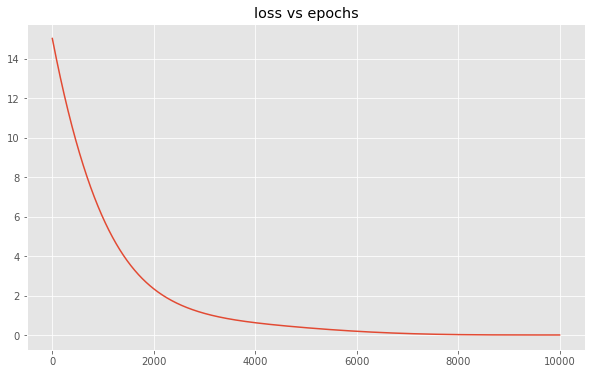

In [36]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(epochs), running_loss)
plt.title('loss vs epochs')

Text(0.5, 1.0, 'w1 over epochs. true w1 = 5')

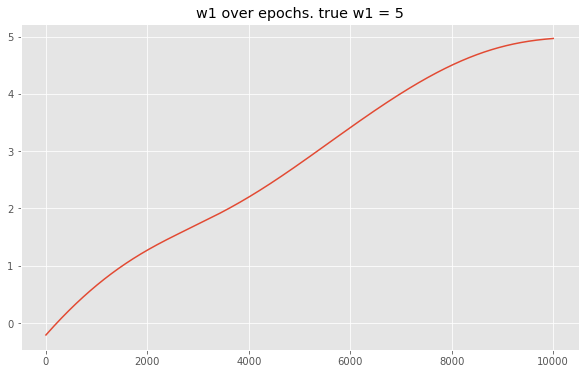

In [37]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(epochs), running_w1)
plt.title('w1 over epochs. true w1 = 5')

Text(0.5, 1.0, 'w2 over epochs. true w2 = 3')

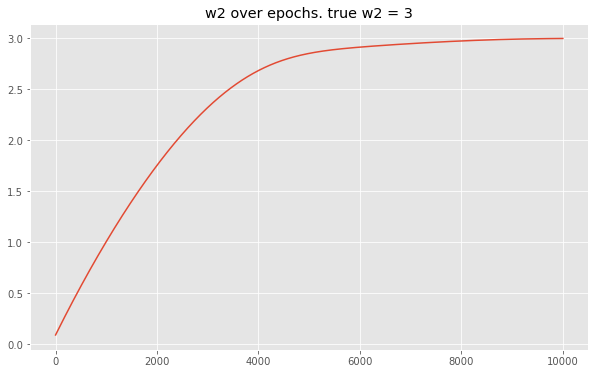

In [38]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(epochs), running_w2)
plt.title('w2 over epochs. true w2 = 3')

### inference

as we can see, it took around 6000 epochs to get the loss down to an acceptable level. as the function was linear, it took only one neuron to approximate it.

final weights:

In [39]:
model1.fc1.weight

Parameter containing:
tensor([[4.9688, 2.9984]], requires_grad=True)